In [18]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido
!pip install opentsne
!pip install nbformat
!pip install pandas
!pip install seaborn
!pip install openpyxl
!pip install matplotlib
!pip install scikit-learn

In [11]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
excel_path = r"mock/titanium sols.xlsx"

In [13]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table1"]['dataframe']
df = df.fillna(value=0)


worksheet name: Sheet1
tables in worksheet: 0

worksheet name: Experiment_data
tables in worksheet: 1
table name: Table1

worksheet name: Experiment_data_2
tables in worksheet: 1
table name: Table2


In [14]:
df.head()

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days"
0,H2O + HNO3 + TiIPO + ButOH,45,60,4,0.5,0,618.5,100.0,16
1,H2O + HNO3 + TiIPO + ButOH,80,10,4,0.5,0,978.1,100.0,16
2,H2O + HNO3 + TiIPO + ButOH,45,20,4,0.5,0,2.0,100.0,90
3,H2O + HNO3 + TiIPO + ButOH,45,20,4,0.47,0,2.628,100.0,60
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4,0.2,0,1712,100.0,16


In [15]:
df.drop('Composition mixtures', axis=1).astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
"t, °С",71.0,62.619718,19.485061,20.00,45.0000,71.000,80.00,93.00
"t, min",71.0,30.633803,30.194720,8.00,11.0000,12.000,57.00,130.00
"с(acid), mol/l",71.0,0.919155,1.468489,0.10,0.1000,0.100,0.53,4.00
"с(Ti4+), mol/l",71.0,0.427042,0.195115,0.14,0.2000,0.520,0.60,0.62
ultrasound,71.0,0.169014,0.413553,0.00,0.0000,0.000,0.00,1.50
"d, nm",71.0,669.500366,897.495190,0.70,2.0495,2.763,2000.00,2159.00
"Contents, %",71.0,97.030986,14.362984,0.50,100.0000,100.000,100.00,100.00
"Stability of sols, days",71.0,25.577465,24.248807,0.00,2.0000,16.000,40.00,90.00


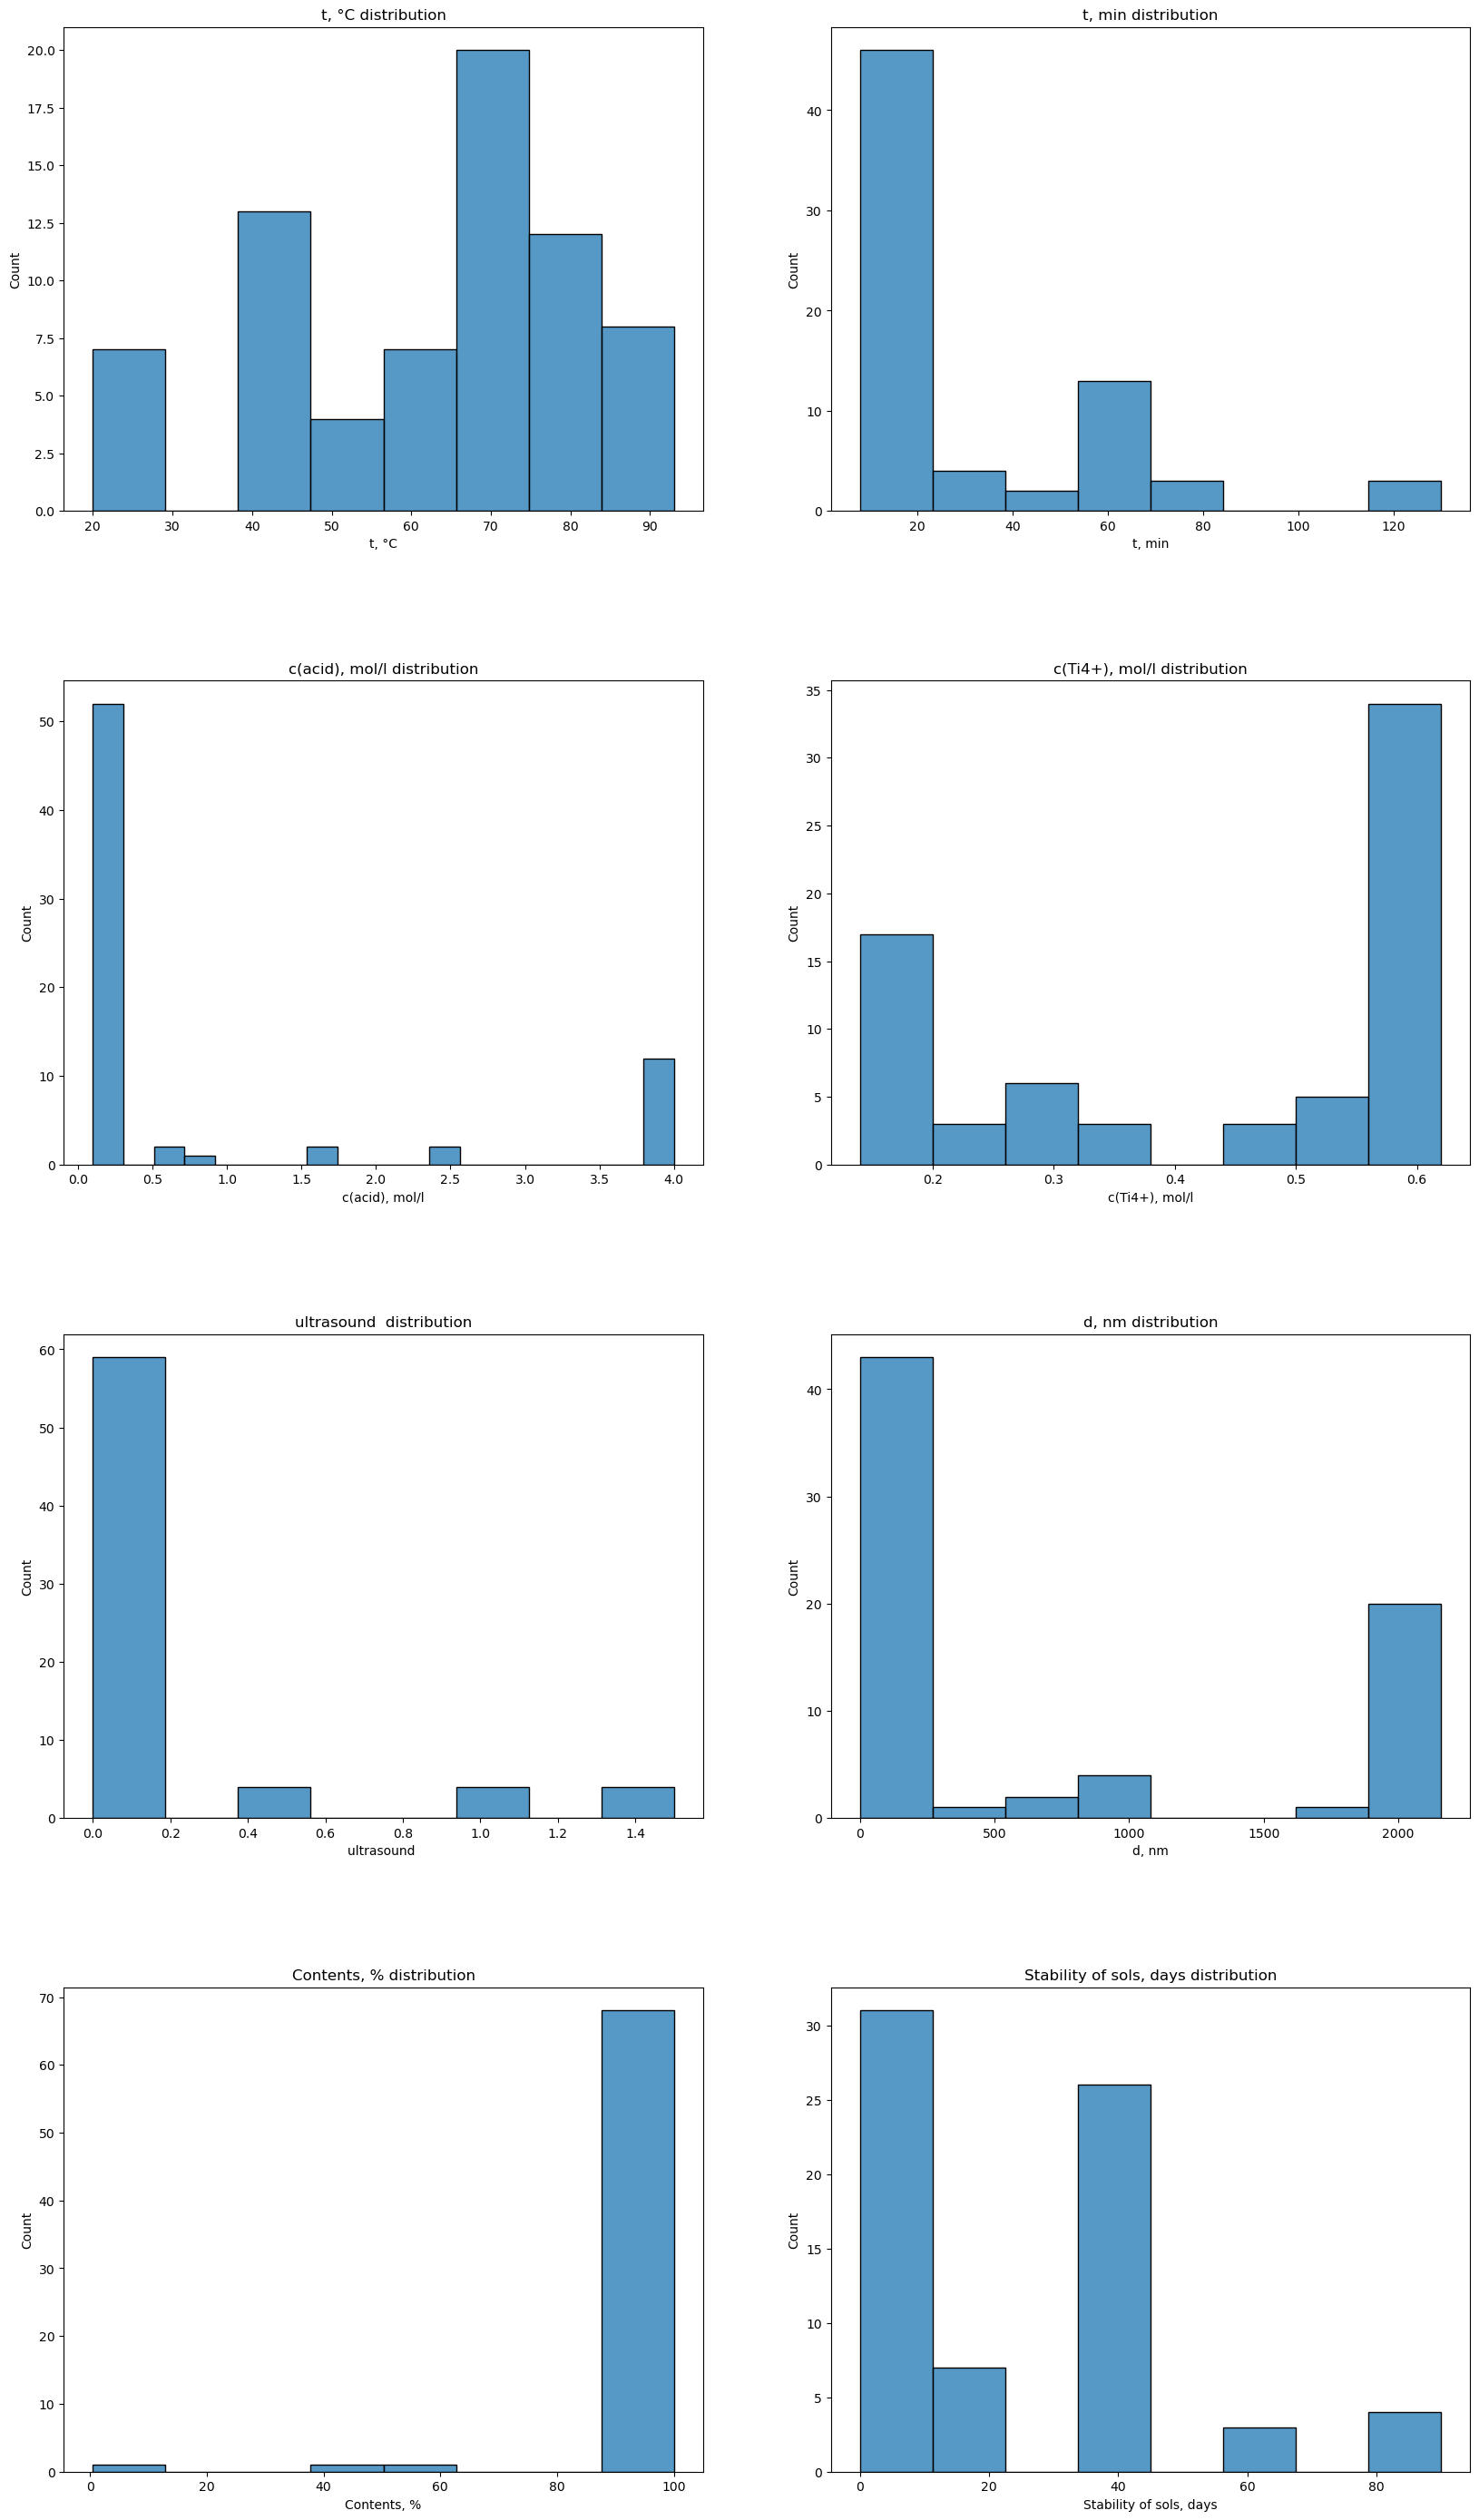

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(20, 35)

for col, ax in zip(df.drop('Composition mixtures', axis=1), axes.flat):
    sns.histplot(df[col].astype('float'), ax=ax).set(title=f'{col} distribution')

fig.subplots_adjust(hspace=0.35)
plt.show()

In [17]:
df_clear =  df.drop('Composition mixtures', axis=1)
df_clear = df_clear.astype('float')

In [18]:
df_clear.columns

Index(['t, °С', 't, min', 'с(acid), mol/l', 'с(Ti4+), mol/l', 'ultrasound ',
       'd, nm', 'Contents, %', 'Stability of sols, days'],
      dtype='object')

In [90]:
df_plot = df_clear.copy(deep=True)

def replace_func_days(x):
    if x < 20:
        return "< 20"
    else:
        return str(x)

# def replace_func_d(x):
#     if x < 50:
#         return "< 50"
#     else:
#         return str(x)

df_plot['Stability of sols, days'] = df_plot['Stability of sols, days'].apply(replace_func_days)
# df_plot['d, nm'] = df_plot['d, nm'].apply(replace_func_d)

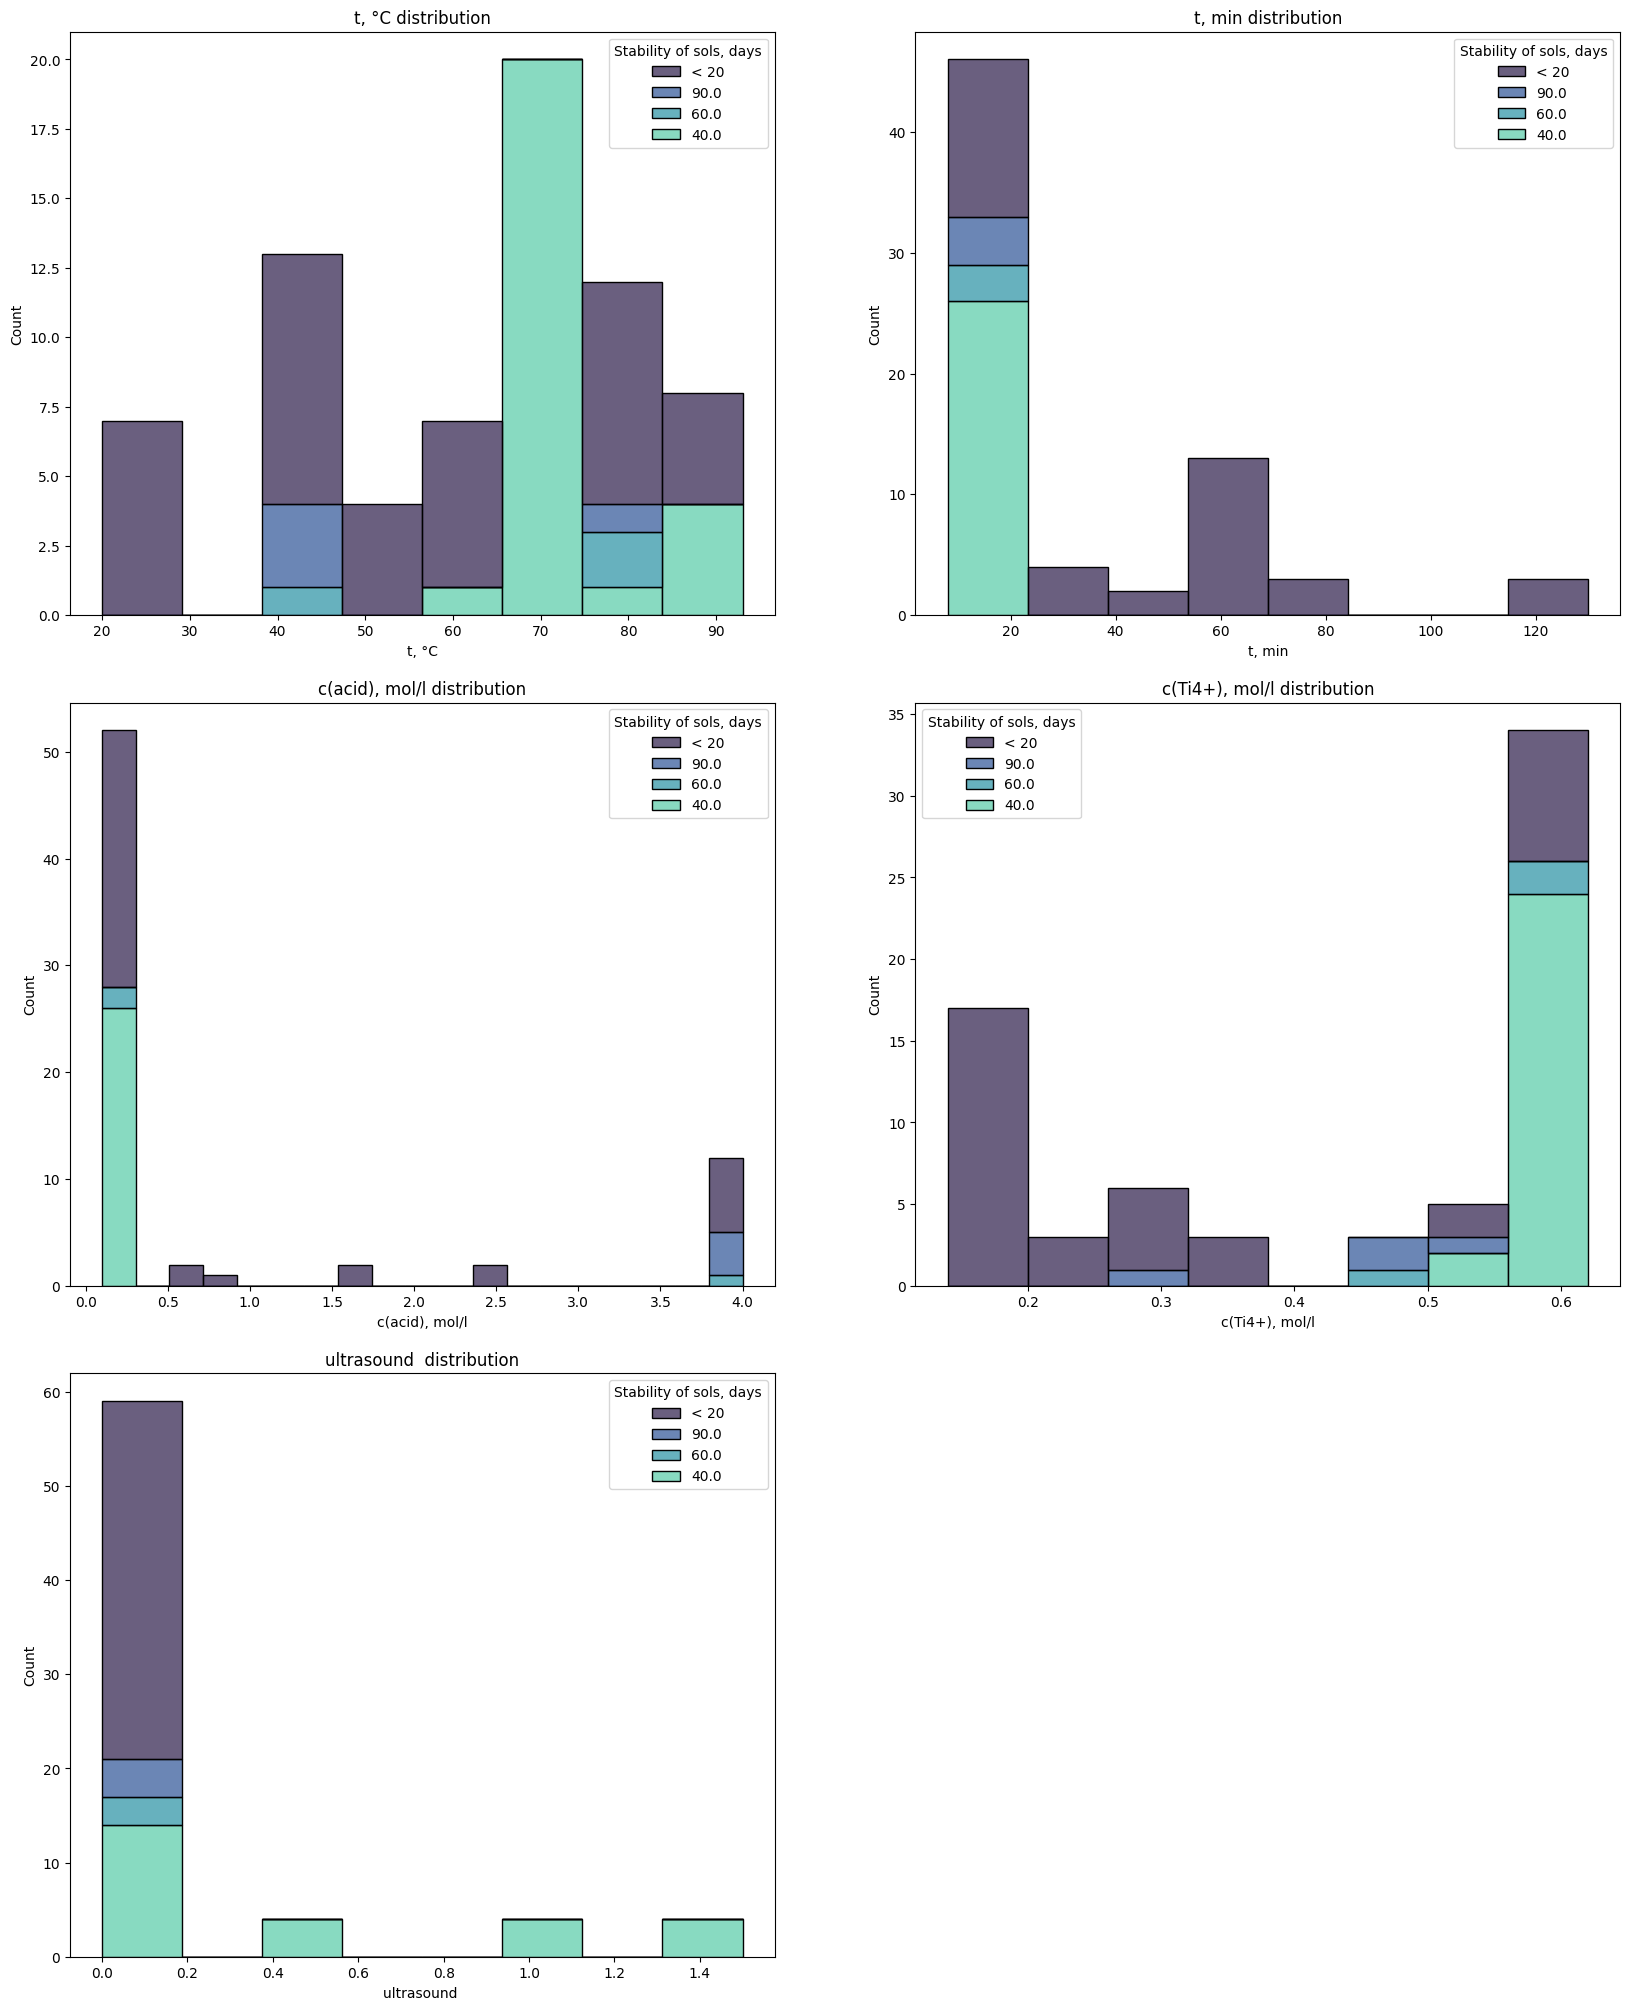

In [86]:
fig, axes = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(20, 25)

for col, ax in zip(['t, °С', 't, min', 'с(acid), mol/l', 'с(Ti4+), mol/l', 'ultrasound '], axes.flat):
    sns.histplot(df_plot, x=col, hue='Stability of sols, days', multiple="stack", palette='mako', ax=ax).set(title=f'{col} distribution')

fig.subplots_adjust(hspace=0.15)
axes[-1, -1].axis('off')
plt.savefig('../static/mock/distibution_with_stability_days.pdf', format='pdf', dpi=600)
plt.show()

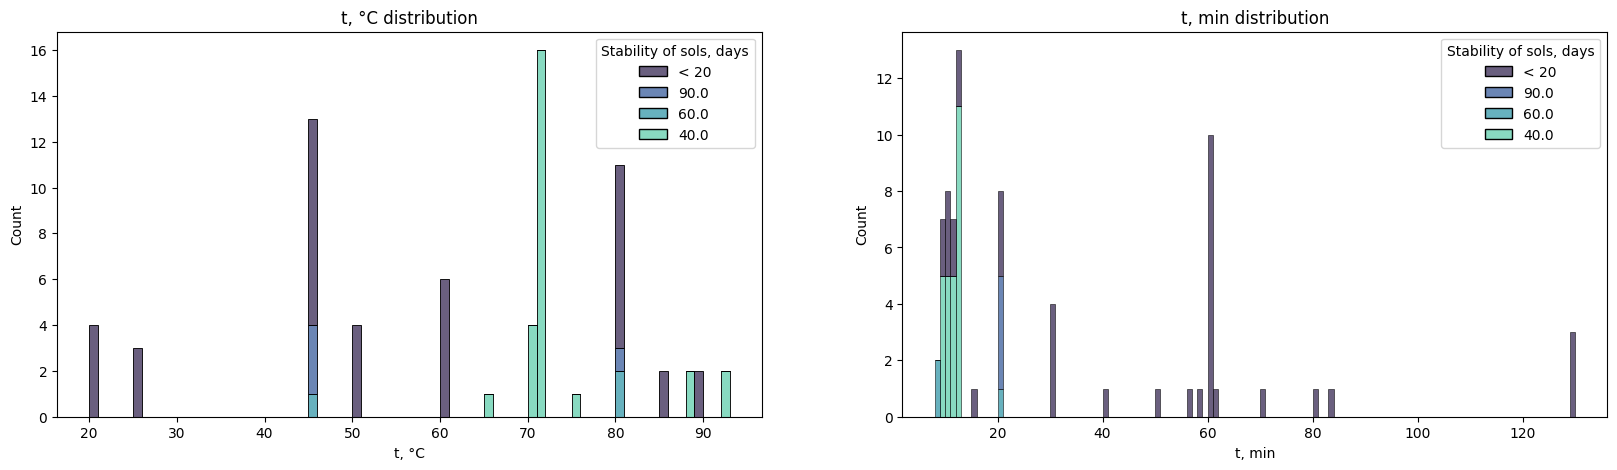

In [118]:
fig, axes = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(20, 5)

for col, ax in zip(['t, °С', 't, min'], axes.flat):
    sns.histplot(df_plot, x=col, hue='Stability of sols, days', multiple="stack", palette='mako', binwidth=1, ax=ax).set(title=f'{col} distribution')

plt.savefig('../static/mock/distibution_with_stability_days_bin3.pdf', format='pdf', dpi=600)
plt.show()

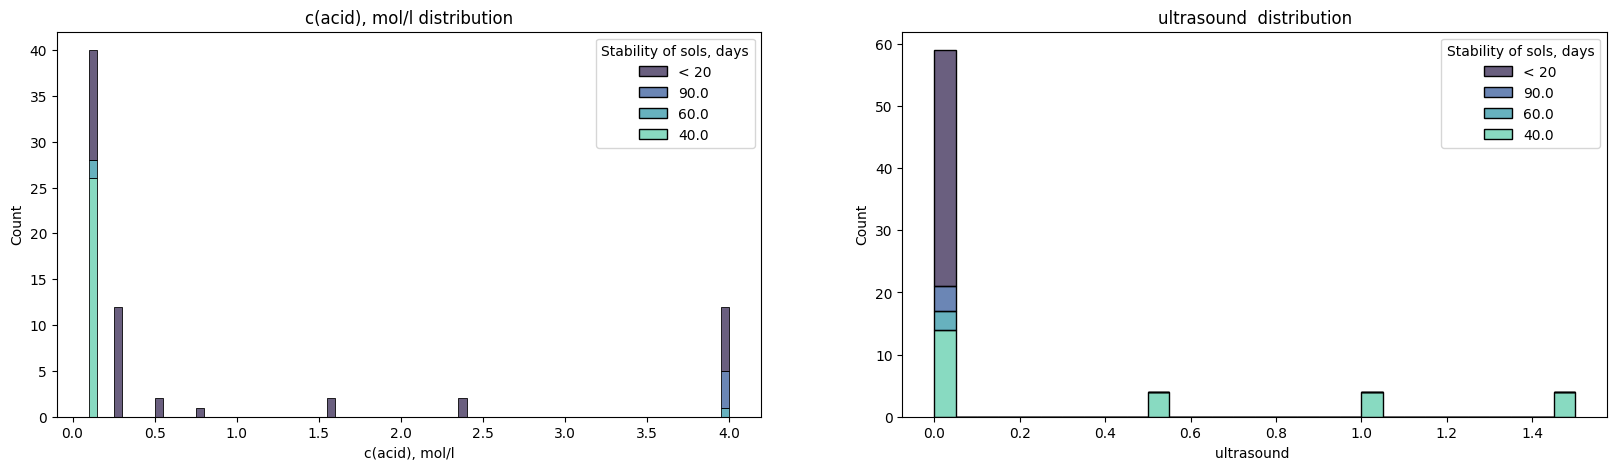

In [122]:
fig, axes = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(20, 5)

for col, ax in zip(['с(acid), mol/l', 'ultrasound '], axes.flat):
    sns.histplot(df_plot, x=col, hue='Stability of sols, days', multiple="stack", palette='mako', ax=ax, binwidth=0.05).set(title=f'{col} distribution')

plt.savefig('../static/mock/distibution_with_stability_days_bin005.pdf', format='pdf', dpi=600)
plt.show()

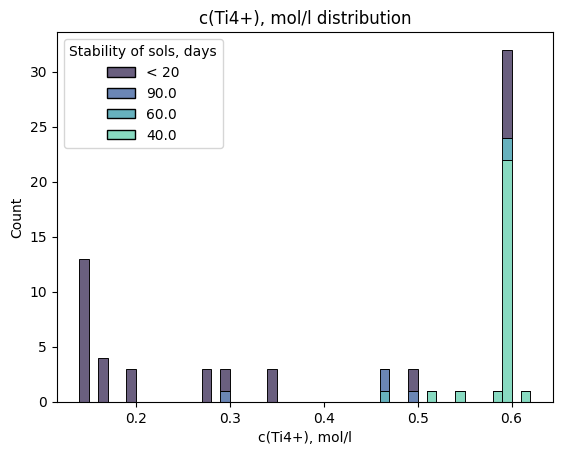

In [123]:
col = 'с(Ti4+), mol/l'
sns.histplot(df_plot, x=col, hue='Stability of sols, days', multiple="stack", palette='mako', binwidth=0.01).set(title=f'{col} distribution')
plt.savefig('../static/mock/distibution_with_stability_days_bin001.pdf', format='pdf', dpi=600)

In [26]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
sca.fit(df_clear)
df_standardized = sca.transform(df_clear)
df_standardized.shape

(71, 8)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(5)
X_pca5 = pca.fit_transform(df_standardized)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.44735179 0.16888894 0.13094936 0.10939437 0.07111657]
0.9277010263101372


In [28]:
components = dict(zip(df_clear.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

d, nm 0.429
t, min 0.427
с(acid), mol/l 0.134
Contents, % -0.132
ultrasound  -0.246
Stability of sols, days -0.359
t, °С -0.406
с(Ti4+), mol/l -0.494


In [29]:
components = dict(zip(df_clear.columns, pca.components_[1]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

с(acid), mol/l 0.754
Stability of sols, days 0.51
с(Ti4+), mol/l -0.022
t, min -0.068
ultrasound  -0.151
d, nm -0.158
t, °С -0.239
Contents, % -0.248


In [30]:
from openTSNE import TSNE

embedding = TSNE(perplexity=23.33).fit(X_pca5)

In [31]:
x_plot = df_clear.copy(deep=True)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]

In [32]:
x_plot.head()

,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days",tsne1,tsne2
0,45,60,4,0.5,0,618.5,100.0,16,2.511658,1.024289
1,80,10,4,0.5,0,978.1,100.0,16,1.646075,1.038535
2,45,20,4,0.5,0,2.0,100.0,90,0.464501,2.219639
3,45,20,4,0.47,0,2.628,100.0,60,0.711773,2.073211
4,50,20,4,0.2,0,1712,100.0,16,2.795339,0.641444


In [42]:
x_plot=x_plot.astype("float")

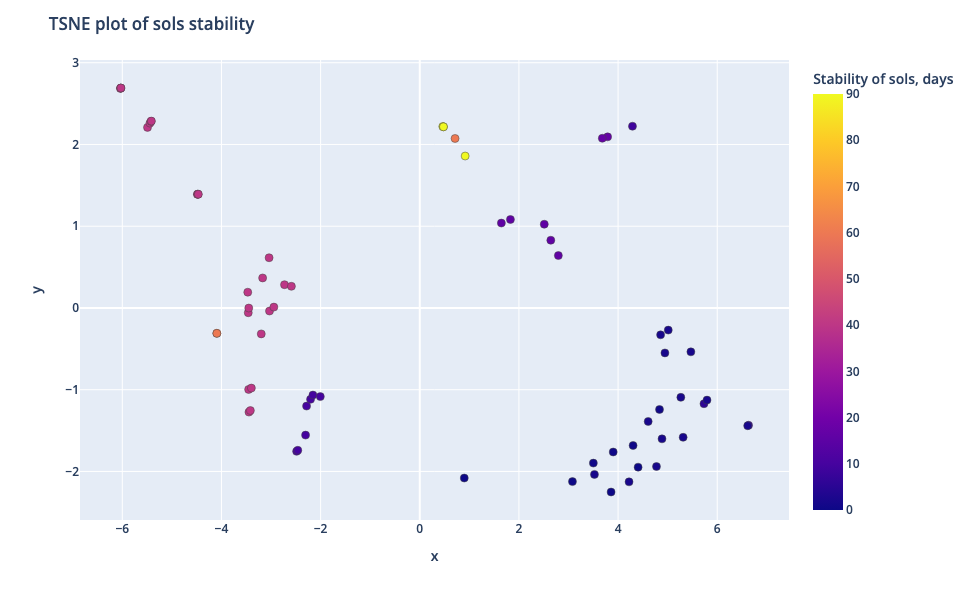

In [120]:
import plotly.express as px

fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='Stability of sols, days', hover_data=df_clear.columns, width=900, height=600)

# # Customize aspect
fig.update_traces(marker=dict(size=8, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of sols stability', xaxis_title='x', yaxis_title='y')
# fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.write_html("TSNE_plot_stability_days.html")
fig.show()

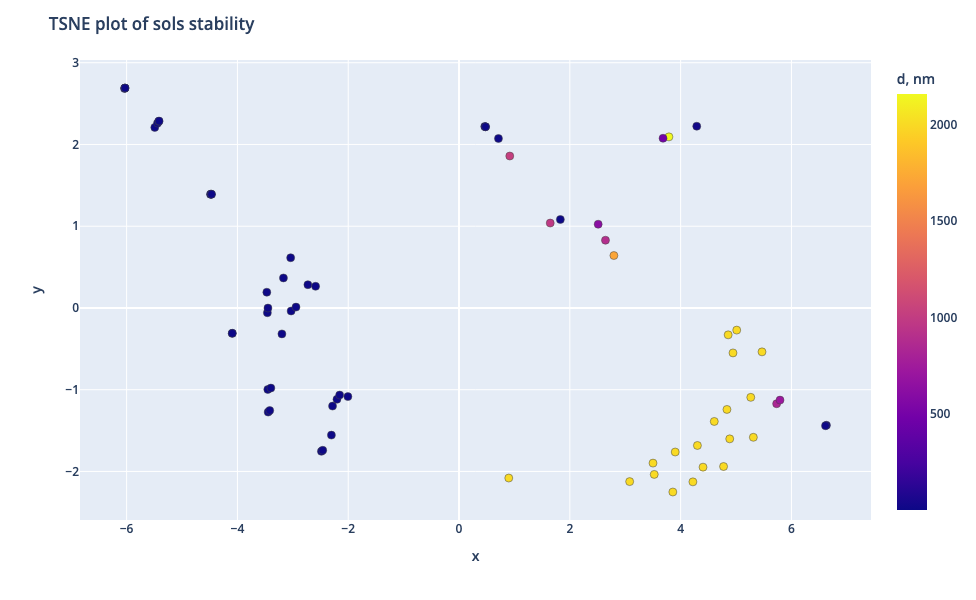

In [121]:
import plotly.express as px

fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='d, nm', hover_data=df_clear.columns, width=900, height=600)

# # Customize aspect
fig.update_traces(marker=dict(size=8, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of sols stability', xaxis_title='x', yaxis_title='y')
# fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.write_html("TSNE_plot_d.html")
fig.show()